In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Two data.csv')
df.head(10)

,IN,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,1,1,68,134,455,153
1,2,1,64,141,353,217
2,3,1,86,180,343,210
3,4,1,75,141,200,174
4,5,1,54,178,449,182
5,6,1,94,141,368,178
6,7,1,80,186,273,137
7,8,1,79,148,330,147
8,9,1,76,137,291,166
9,10,1,73,141,176,140


In [3]:
df.drop('IN',axis=1,inplace=True)

In [4]:
df.head()

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,1,68,134,455,153
1,1,64,141,353,217
2,1,86,180,343,210
3,1,75,141,200,174
4,1,54,178,449,182


## EDA Analysis

In [5]:
df.shape  #very small data :( sad_ not a problem

(68, 5)

#### 1) Finding missing values in features

In [6]:
df.isnull().sum()

Class                  0
Heart_Rate             0
Cholestrol_Level       0
Triglycerides_Level    0
Fasting_Blood_Sugar    0
dtype: int64

#### 2) Checking numerical features

In [7]:
for feature in df.columns:
    print(f"{feature} has {df[feature].dtype} Type")

Class has int64 Type
Heart_Rate has int64 Type
Cholestrol_Level has int64 Type
Triglycerides_Level has int64 Type
Fasting_Blood_Sugar has int64 Type


In [8]:
numerical_feat=[feature for feature in df.columns if df[feature].dtype!='o']
numerical_feat

['Class',
 'Heart_Rate',
 'Cholestrol_Level',
 'Triglycerides_Level',
 'Fasting_Blood_Sugar']

#### 3) Finding continuous and discrete feature from numerical feature

In [9]:
continuous_feat=[]
discrete_feat=[]
for feature in numerical_feat:
    if len(df[feature].unique())<=10:
        discrete_feat.append(feature)
    else:
        continuous_feat.append(feature)
continuous_feat,discrete_feat

(['Heart_Rate',
  'Cholestrol_Level',
  'Triglycerides_Level',
  'Fasting_Blood_Sugar'],
 ['Class'])

In [10]:
#As class is our target variable so there is no feature of discrete value

#### 4) Histogram of Continuous Features

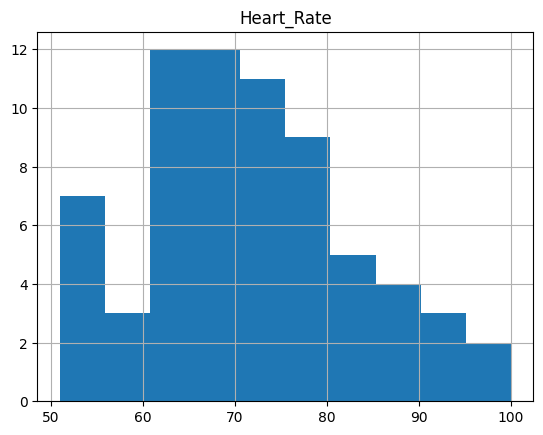

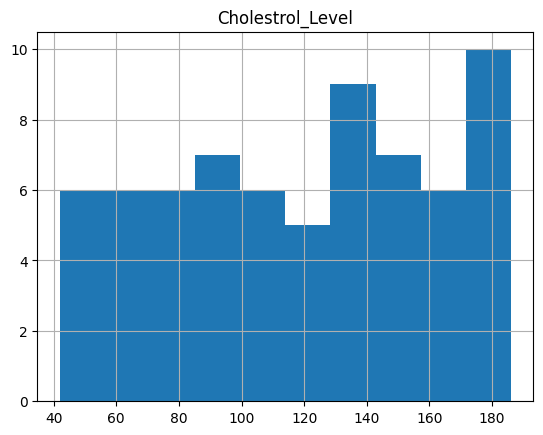

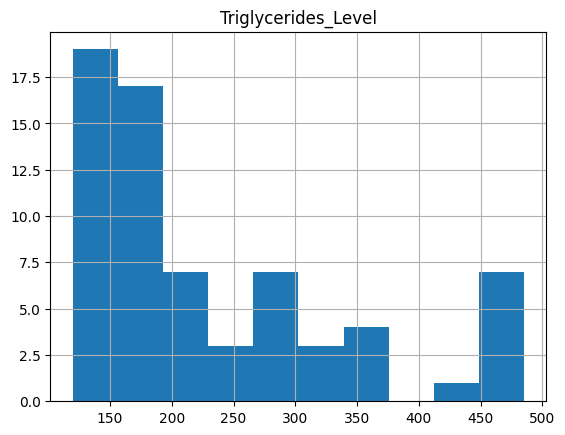

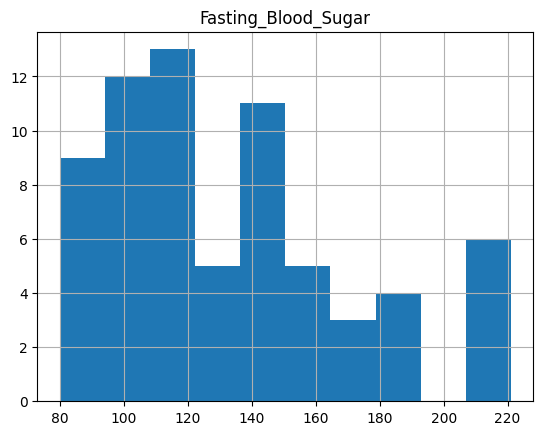

In [11]:
for feature in continuous_feat:
    df[feature].hist()
    plt.title(feature)
    plt.show()

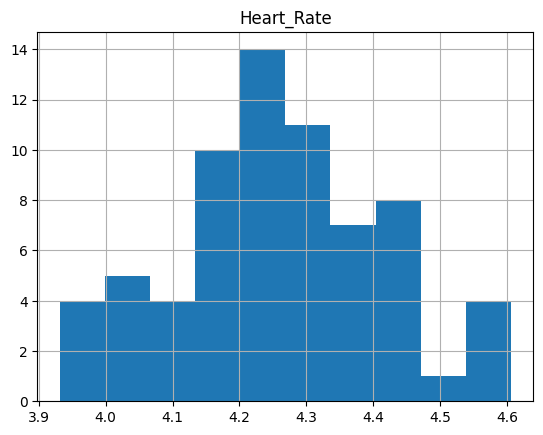

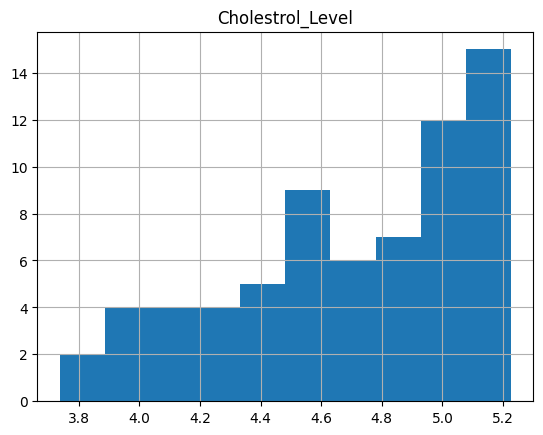

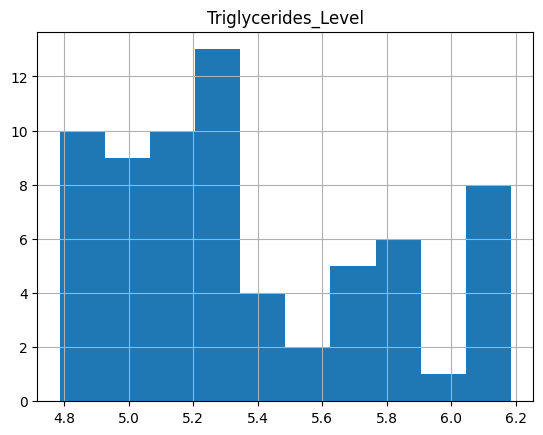

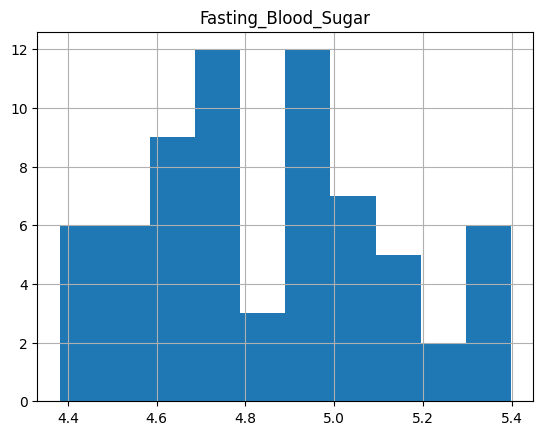

In [12]:
#convert it into guassian form and then plot
for feature in continuous_feat:
    np.log(df[feature]).hist()
    plt.title(feature)
    plt.show()

#### 5) Finding outliers only removing

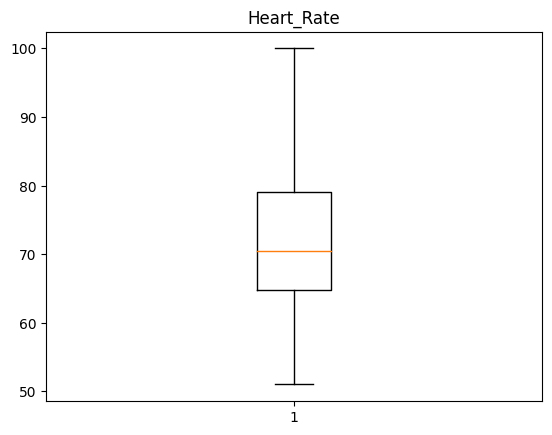

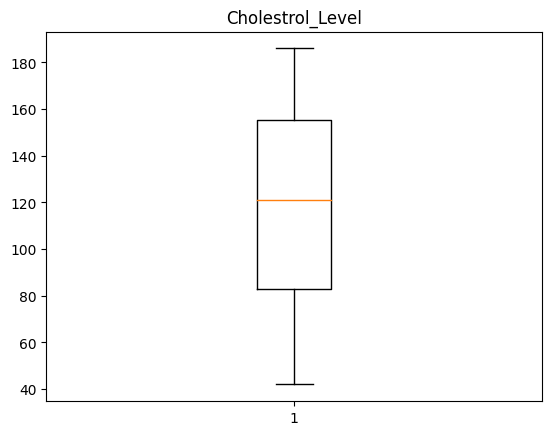

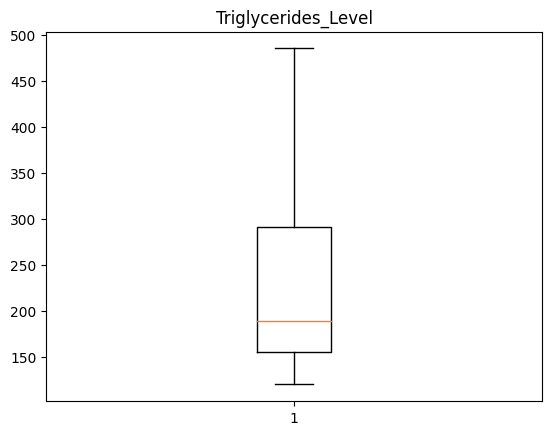

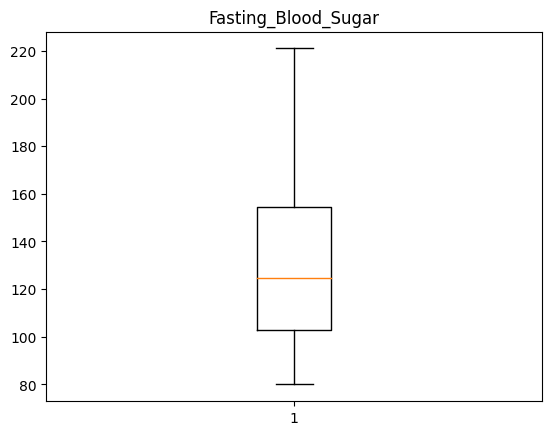

In [13]:
for feature in continuous_feat:
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [14]:
# so there is no outliers thats very good

#### 6) finding relation between class and features

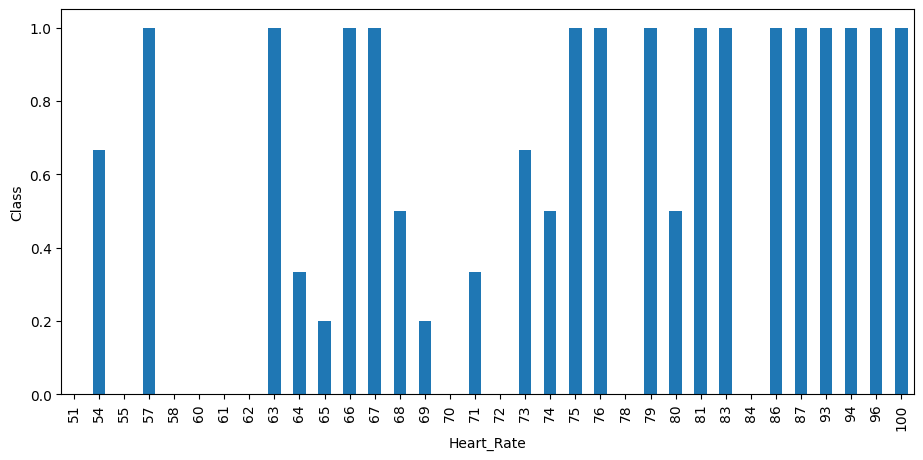

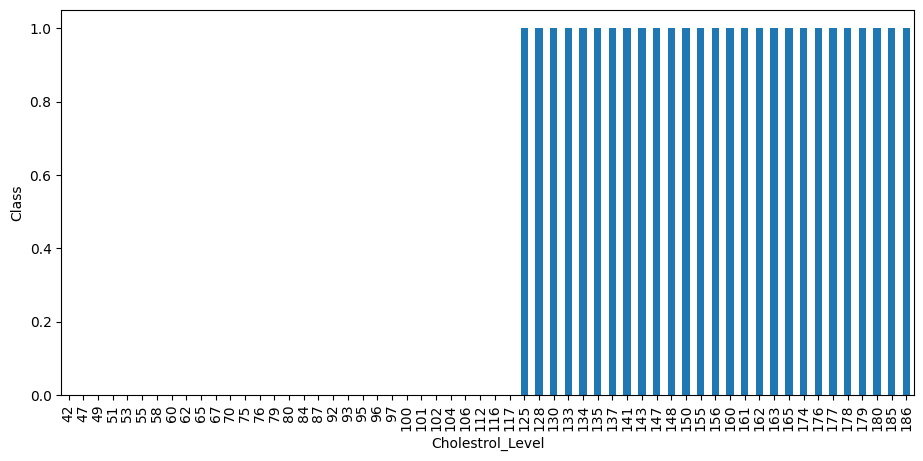

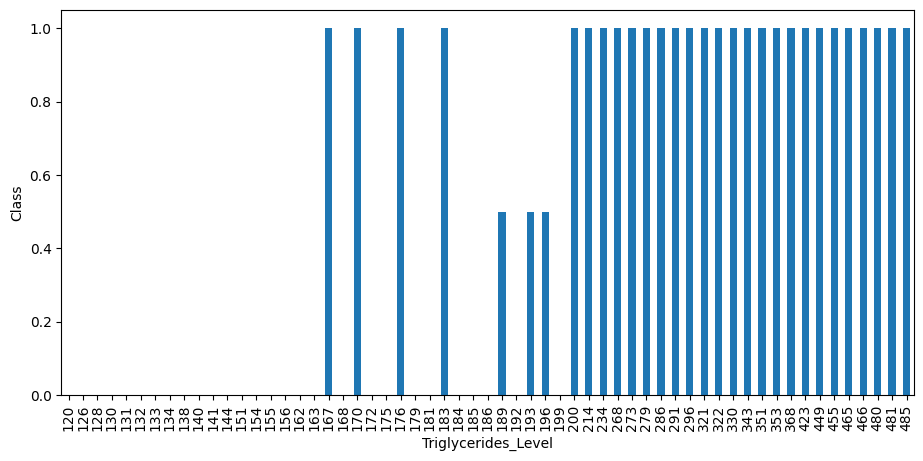

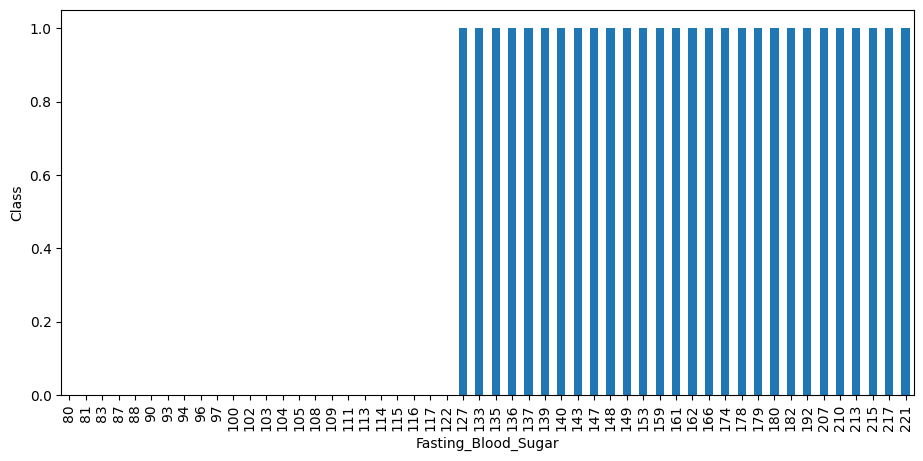

In [15]:
for feature in continuous_feat:
    plt.figure(figsize=(11,5))
    df.groupby(feature)['Class'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Class')
    plt.show()

#### 7) checking Categorical features

In [16]:
cat_feat=[feature for feature in df.columns if df[feature].dtype=='o']
cat_feat

[]

## Feature Engineering

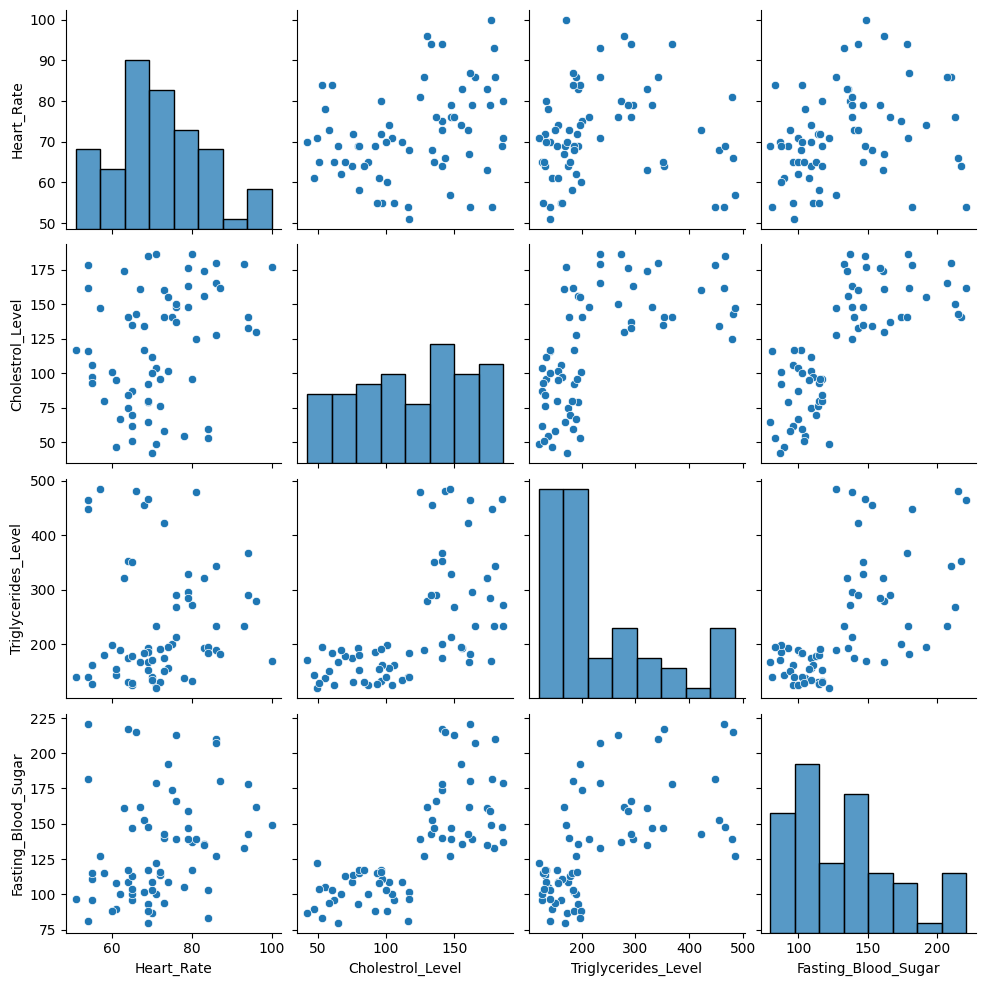

In [17]:
import seaborn as sns
sns.pairplot(df[continuous_feat])
plt.show()

<Axes: >

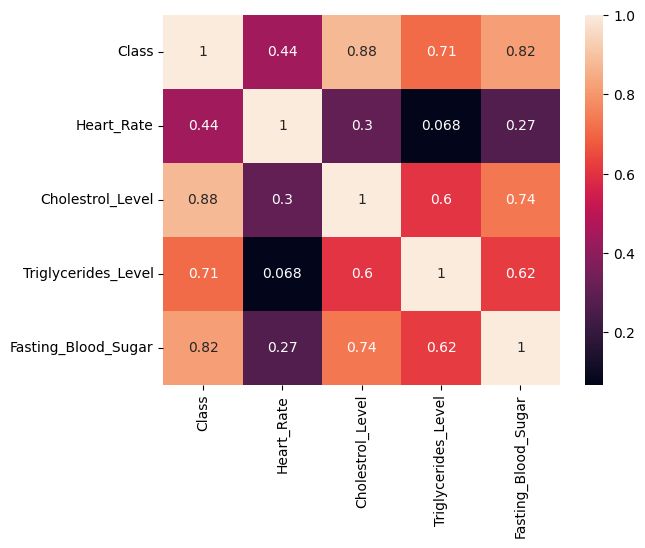

In [18]:
correlation_matrix = df[df.columns].corr()
sns.heatmap(correlation_matrix,annot=True)

In [19]:
#Heart has less realtion with respect to class

In [20]:
#Lets extract new features and see their relation
df1=df.copy()

In [21]:
df1.columns

Index(['Class', 'Heart_Rate', 'Cholestrol_Level', 'Triglycerides_Level',
       'Fasting_Blood_Sugar'],
      dtype='object')

In [22]:
df1['HR_CL'] = df1['Heart_Rate'] / df1['Cholestrol_Level']
df1['HR_TRL'] = df1['Heart_Rate'] / df1['Triglycerides_Level']
df1['HR_FBS'] = df1['Heart_Rate'] / df1['Fasting_Blood_Sugar']
df1['CL_TRL'] = df1['Cholestrol_Level'] / df1['Triglycerides_Level']
df1['CL_FBS'] = df1['Cholestrol_Level'] / df1['Fasting_Blood_Sugar']
df1['TRL_FBS'] = df1['Triglycerides_Level'] / df1['Fasting_Blood_Sugar']

In [23]:
df1.head()

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar,HR_CL,HR_TRL,HR_FBS,CL_TRL,CL_FBS,TRL_FBS
0,1,68,134,455,153,0.507463,0.149451,0.444444,0.294505,0.875817,2.973856
1,1,64,141,353,217,0.453901,0.181303,0.294931,0.399433,0.649770,1.626728
2,1,86,180,343,210,0.477778,0.250729,0.409524,0.524781,0.857143,1.633333
3,1,75,141,200,174,0.531915,0.375000,0.431034,0.705000,0.810345,1.149425
4,1,54,178,449,182,0.303371,0.120267,0.296703,0.396437,0.978022,2.467033


<Axes: >

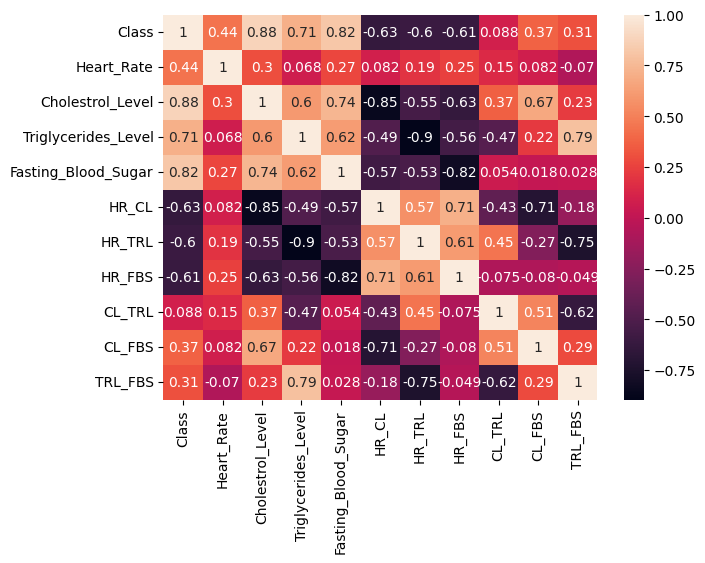

In [24]:
cm = df1[df1.columns].corr()
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)

In [25]:
#No Missing values
#No outliers

## Model development (with and without scaling) on 1st data frame(without feature Engineering)

In [26]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
Y=df['Class']

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((54, 4), (14, 4))

#### 1) SVC Model

In [28]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
print(f"SVC model has {(svc.score(X_test,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


#### 2) Random forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_depth=4,max_features='sqrt')
RF.fit(X_train,Y_train)
print(f"Random forest classifier model has {(RF.score(X_test,Y_test))*100}% Accuracy")

Random forest classifier model has 100.0% Accuracy


#### 3) Neural Networks 

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [84]:
classifier = Sequential()
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu', input_dim=4)) # 1st hidden layer + input layer
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu')) # 2nd hidden layer
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu')) # 3rd hidden layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #output layer
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #overall compiling
classifier.fit(X_train,Y_train,batch_size=10,epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.6296
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.7222
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5185
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5185
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5185
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5185
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5185
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.5185
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.5185
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.5185
Epoch 11/500
6/6 [===========

In [85]:
y_pred=classifier.predict(X_test)

1/1 [==============================] - 0s 96ms/step


In [86]:
y_pred

array([[0.35472918],
       [0.515775  ],
       [0.9879227 ],
       [0.6029407 ],
       [0.9984759 ],
       [0.01559069],
       [0.93008864],
       [0.05910594],
       [0.14034104],
       [0.03647356],
       [0.9773051 ],
       [0.02999833],
       [0.005851  ],
       [0.03303008]], dtype=float32)

In [87]:
y_pred=(y_pred>0.50)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[8, 0],
       [0, 6]], dtype=int64)

In [35]:
# 100% accuracy

#### with scaling

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [89]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

#### 1) SVC Model

In [92]:
from sklearn.svm import SVC
svc_s=SVC(kernel='rbf')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


#### 2) Random forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF_s=RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_depth=4,max_features='sqrt')
RF_s.fit(X_train_scaled,Y_train)
print(f"Random forest classifier model has {(RF_s.score(X_test_scaled,Y_test))*100}% Accuracy")

Random forest classifier model has 100.0% Accuracy


#### 3) Neural Networks 

In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [95]:
classifier_s = Sequential()
classifier_s.add(Dense(units=9, kernel_initializer='uniform', activation='relu', input_dim=4)) # 1st hidden layer + input layer
classifier_s.add(Dense(units=9, kernel_initializer='uniform', activation='relu')) # 2nd hidden layer
classifier_s.add(Dense(units=9, kernel_initializer='uniform', activation='relu')) # 3rd hidden layer
classifier_s.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #output layer
classifier_s.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #overall compiling
classifier_s.fit(X_train_scaled,Y_train,batch_size=10,epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4259
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5185
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5185
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5185
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5185
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5185
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5185
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5185
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5185
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5185
Epoch 11/500
6/6 [===========

In [98]:
y_pred_s=classifier_s.predict(X_test_scaled)

1/1 [==============================] - 0s 87ms/step


In [99]:
y_pred_s

array([[3.1319636e-05],
       [9.9999899e-01],
       [9.9973804e-01],
       [9.9999982e-01],
       [9.9959594e-01],
       [4.0616571e-05],
       [9.9999624e-01],
       [7.7971497e-05],
       [3.5574434e-05],
       [8.0662998e-05],
       [9.9999994e-01],
       [4.0222181e-05],
       [2.3897699e-06],
       [1.2122056e-05]], dtype=float32)

In [100]:
y_pred_s=(y_pred_s>0.50)
from sklearn.metrics import confusion_matrix
cm_s=confusion_matrix(Y_test,y_pred_s)
cm_s

array([[8, 0],
       [0, 6]], dtype=int64)

In [101]:
# see my magic 100% accuracy, actually not my but dataset :)

## 4) Model development (with scaling) on 2nd data frame(with feature Engineering and selection)

In [105]:
from sklearn.model_selection import train_test_split
X=df1.drop('Class',axis=1)
Y=df1['Class']

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((54, 10), (14, 10))

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [108]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

#### Feature Selection using Mutual classiff information method

In [109]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [110]:
Mutual=mutual_info_classif(X_train_scaled,Y_train)
Mutual

array([0.04954004, 0.68730012, 0.42646918, 0.68946061, 0.41168214,
       0.23187964, 0.26191984, 0.1637037 , 0.04622134, 0.        ])

In [111]:
S=pd.Series(Mutual)
S.index=X_train.columns
S.sort_values(ascending=False)

Fasting_Blood_Sugar    0.689461
Cholestrol_Level       0.687300
Triglycerides_Level    0.426469
HR_CL                  0.411682
HR_FBS                 0.261920
HR_TRL                 0.231880
CL_TRL                 0.163704
Heart_Rate             0.049540
CL_FBS                 0.046221
TRL_FBS                0.000000
dtype: float64

<Axes: >

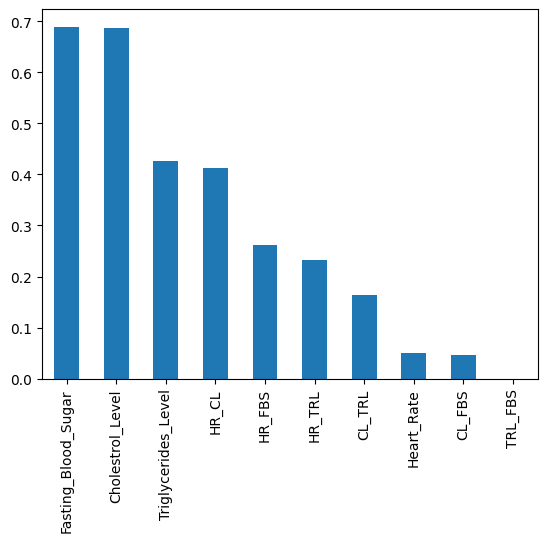

In [112]:
S.sort_values(ascending=False).plot.bar()

In [114]:
Sel=SelectKBest(mutual_info_classif,k=4)
Sel.fit(X_train_scaled,Y_train)
Sel.get_support()
select=X_train_scaled.columns[Sel.get_support()]

In [117]:
select=select.tolist()

In [118]:
X_train_scaled=X_train_scaled[select]
X_test_scaled=X_test_scaled[select]

#### SVM model after Feature engineering

In [120]:
from sklearn.svm import SVC
svc_s=SVC(kernel='rbf')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


In [124]:
X_train_scaled.head()

,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar,HR_CL
0,-0.670859,-0.999134,-0.500397,-0.298131
1,-1.081745,-0.542150,-0.650794,0.480977
2,1.269433,2.121967,1.179042,-1.154847
3,-0.625205,-0.736612,-0.675860,-0.147306
4,1.452049,0.031510,1.103843,-0.921801


#### if we select feature greater than information of 50% them

In [126]:
X_train_scaled=X_train_scaled[['Fasting_Blood_Sugar','Cholestrol_Level']]
X_test_scaled=X_test_scaled[['Fasting_Blood_Sugar','Cholestrol_Level']]

In [130]:
from sklearn.svm import SVC
svc_s=SVC(kernel='linear')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


In [132]:
## 100 % accuracy because data is well preprocessed and form guassian curve